In [1]:
# Импортируем библиотеки
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

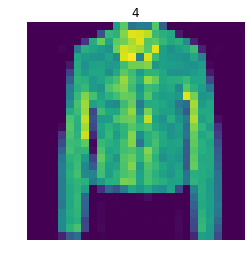

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
targets_train = train_labels[0:100]
features_train = train_images[0:100]/10

targets_test = test_labels
features_test = test_images/ 255

featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) 

# Аналогично для тестового датасета.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

# batch_size == размер батча, epoch == количество эпох обучения и iteration == количество итераций
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Датасет в Pytorch 
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# создадим загрузчик данных в PyTorch - data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# Визуализируем одно из изображений
plt.imshow(features_test[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_test[10]))
plt.savefig('graph.png')
plt.show()


In [8]:
# Импорт библиотек
import torch
import torch.nn as nn
from torch.autograd import Variable

In [9]:
# Создание ANN модели
class ANNModel(nn.Module):
    
   
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Линейная функция 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Не линейная функция 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Не линейная функция 2
        self.tanh2 = nn.ReLU()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Не линейная функция 3
        self.elu3 = nn.ELU()
        
        self.fc4 = nn.Linear(input_dim, hidden_dim) 
        # Не линейная функция 4
        self.relu4 = nn.ReLU()
        
       
        self.fc5 = nn.Linear(hidden_dim, hidden_dim)
        # Не линейная функция 5
        self.tanh5 = nn.ReLU()
        
        self.fc6 = nn.Linear(hidden_dim, hidden_dim)
        # Не линейная функция 6
        self.elu6 = nn.ELU()
        
        self.fc7 = nn.Linear(input_dim, hidden_dim) 
        # Не линейная функция 7
        self.relu7 = nn.ReLU()
        
   
        self.fc8 = nn.Linear(hidden_dim, hidden_dim)
        # Не линейная функция 8
        self.tanh8 = nn.ReLU()
        
        
        self.fc9 = nn.Linear(hidden_dim, hidden_dim)
        # Не линейная функция 9
        self.elu9 = nn.ELU()
        
        # Linear function 10 (readout): 150 --> 10
        self.fc10 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Линейная функция 1
        out = self.fc1(x)
        # Не линейная функция 1
        out = self.relu1(out)
        
        # Линейная функция 2
        out = self.fc2(out)
        # Не линейная функция 2
        out = self.tanh2(out)
        
        # Линейная функция 3
        out = self.fc3(out)
        # Не линейная функция 3
        out = self.elu3(out)
        
        out = self.fc4(x)
        # Не линейная функция 4
        out = self.relu4(out)
        
        # Линейная функция 5
        out = self.fc5(out)
        # Не линейная функция 5
        out = self.tanh5(out)
        
        # Линейная функция 6
        out = self.fc6(out)
        # Не линейная функция 6
        out = self.elu6(out)
        
        out = self.fc7(x)
        # Не линейная функция 7
        out = self.relu7(out)
        
        # Линейная функция 8
        out = self.fc8(out)
        # Не линейная функция 8
        out = self.tanh8(out)
        
        # Линейная функция 9
        out = self.fc9(out)
        # Не линейная функция 9
        out = self.elu9(out)
        
        
        
        # Линейная функция 10 (readout)
        out = self.fc10(out)
        return out

# Зададим параметры сети ANN
input_dim = 28*28
hidden_dim = 200 #Размерности скрытых слоев это гиперпараметры которые настраиваются во время обучения. 150 было выбрано произвольно
output_dim = 10

# Создадим экземпляр ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Зададим loss функцию как кросс энтропию
error = nn.CrossEntropyLoss()

# SGD оптимизатор
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
# Обучение модели
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        train = train.float()
        labels = Variable(labels)
        
        # Обнулим градиенты
        optimizer.zero_grad()
        #print(train..float())
        # Проведем forward propagation
        outputs = model(train)
        
        # Посчитаем loss функцию 
        loss = error(outputs, labels)
        
        # Расчитаем градиенты
        loss.backward()
        
        # Обновим параметры сети
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Подсчет точности        
            correct = 0
            total = 0
            # Работа с тестовым датасетом
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                test = test.float()
                # Проведем Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # Сохраним loss и iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Выведем Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.0021728496067225933  Accuracy: 63.15999984741211 %
Iteration: 1000  Loss: 0.0008370460709556937  Accuracy: 64.16999816894531 %
Iteration: 1500  Loss: 0.0004942594678141177  Accuracy: 64.61000061035156 %
Iteration: 2000  Loss: 0.00034334315569140017  Accuracy: 65.0 %
Iteration: 2500  Loss: 0.0002600285515654832  Accuracy: 65.19000244140625 %
Iteration: 3000  Loss: 0.00020775031589437276  Accuracy: 65.4000015258789 %
Iteration: 3500  Loss: 0.00017214885156136006  Accuracy: 65.52999877929688 %
Iteration: 4000  Loss: 0.00014643876056652516  Accuracy: 65.58999633789062 %
Iteration: 4500  Loss: 0.00012707835412584245  Accuracy: 65.61000061035156 %
Iteration: 5000  Loss: 0.00011196412378922105  Accuracy: 65.66000366210938 %
Iteration: 5500  Loss: 9.99025724013336e-05  Accuracy: 65.69000244140625 %
Iteration: 6000  Loss: 9.005134052131325e-05  Accuracy: 65.7699966430664 %
Iteration: 6500  Loss: 8.188151696231216e-05  Accuracy: 65.81999969482422 %
Iteration: 7000  Loss: 

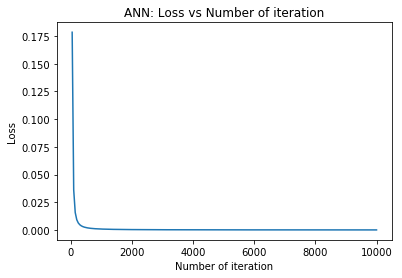

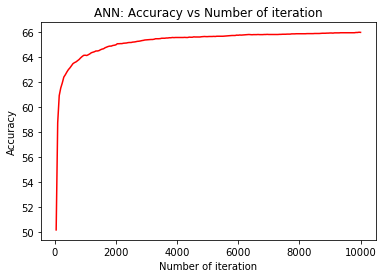

In [11]:
# Визуализация loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# Визуализация accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()